# AI - Analyzer

In [1]:
import pandas as pd
import json

# Path to the JSON file
json_file_path = '../data/transcriptions (3).json'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract the "data" list which contains the records starting from "id"
records = data[2]['data']

# Convert the list of records into a DataFrame
df = pd.DataFrame(records)

# Display the DataFrame
df.head()


,id,processingdate,transcription,summary
0,18531,2024-09-24 13:44:12,"Goedemiddag, dit is natuurlijk helemaal Hendri...",Sta Bosma van Barbara Bosma belde met een tech...
1,18526,2024-09-24 13:18:10,"Goedemiddag, Michel. Hey, Michael met Carla VW...",Carla van VW Elektro Service belde Michael Kes...
2,18522,2024-09-24 13:08:11,"Hitler van Mikoell. Hallo, Miko. Goed. Mijn na...",Olivia van Akstal heeft contact opgenomen om i...
3,18509,2024-09-24 11:54:31,"Met Peter Fritswijk. Dag Peter met Gerwinant, ...",Gerwinant van 10Telecom had een gesprek met Pe...
4,18498,2024-09-24 11:24:16,"Ik vind het wel mooi van. Dag, goedendag. Met ...",Richard van de Zwalspetje belde met Hendrik St...


In [2]:
df.tail()

,id,processingdate,transcription,summary
2774,5,2024-03-22 10:52:25,"Een, twee, drie, vier, vijf. 1, 2, 3, 4, 5. Ha...",Er is geen relevante informatie voor een samen...
2775,4,2024-03-22 10:51:43,"Goedemorgen, wilkom Henrik. Hallo, Adfica doe ...",Henrik heeft gebeld over de migratie van telef...
2776,3,2024-03-22 10:51:29,"Toets dan een 1, laat uw ordennummer achter en...",Ik sta klaar om je te helpen zodra je een gesp...
2777,2,2024-03-22 10:43:46,Al onze medewerkers zijn nog in gesprek. We vr...,Douwe Opperkamp heeft teruggebeld naar 10Telec...
2778,1,2024-03-22 10:41:03,Bedankt voor het bellen. Dit is de voicemail v...,Een voicemailbericht van Moreprofit en SalesPr...


In [3]:
# Column names
df.columns

Index(['id', 'processingdate', 'transcription', 'summary'], dtype='object')

In [4]:
df.size

11116

# Explorative Data Analysis (EDA)

## Wordcloud of the summary column without text cleaning

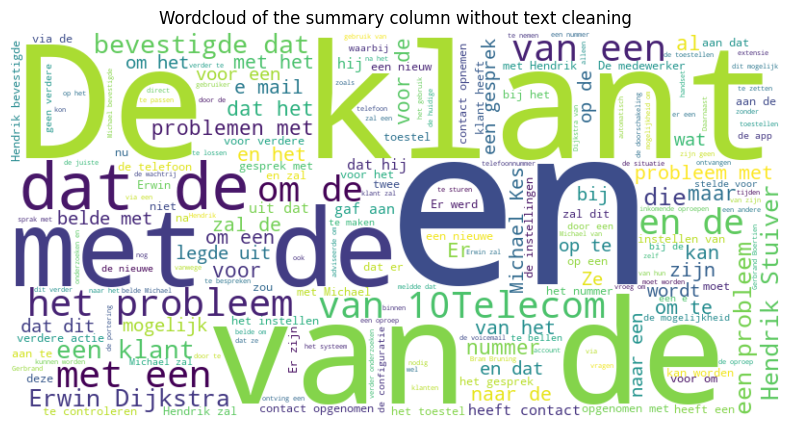

In [5]:
# Importing required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

# Extract the 'summary' column
summaries = df['summary'].dropna()

# Combine all summaries into one text string
text = " ".join(summaries)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Wordcloud of the summary column without text cleaning')
plt.show()


## Wordcloud of the summary column after text cleaning

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredbone/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


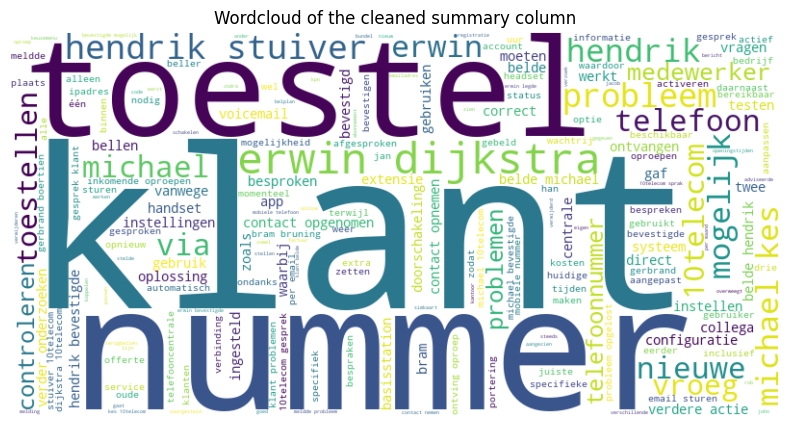

In [8]:
# Import necessary libraries
import string
import nltk
from collections import Counter

# Download the Dutch stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Dutch stopwords list
dutch_stopwords = set(stopwords.words('dutch'))

# Function to clean and preprocess text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in dutch_stopwords]
    return " ".join(words)


# Clean the summaries
cleaned_summaries = summaries.apply(clean_text)

# Combine all cleaned summaries into one text string
cleaned_text = " ".join(cleaned_summaries)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of the cleaned summary column')
plt.axis('off')
plt.show()



## Top 20 Word Frequencies in Cleaned Summary Column

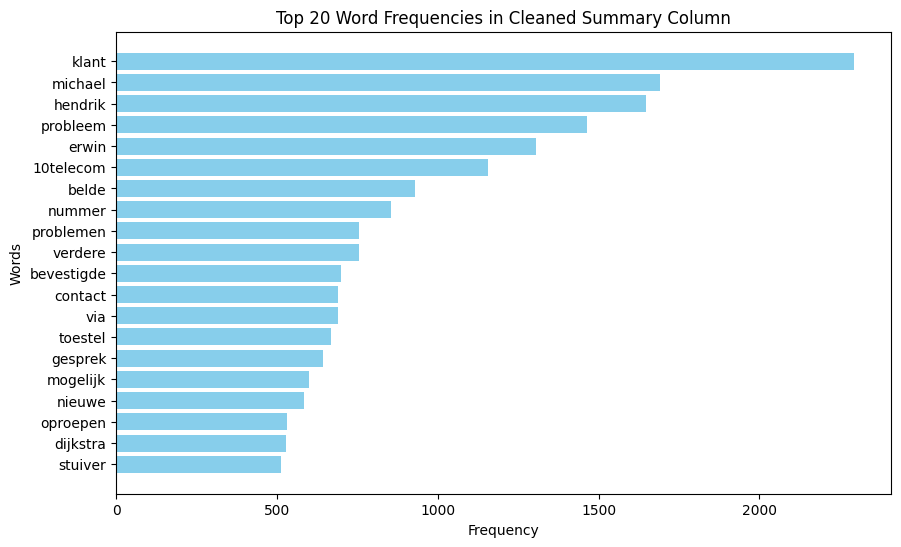

In [9]:
# Generate the word frequencies
word_counts = Counter(cleaned_text.split())

# Get the top 20 most common words
common_words = word_counts.most_common(20)

# Split the words and their frequencies for the chart
words, frequencies = zip(*common_words)

# Generate a bar chart for the word frequencies
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Word Frequencies in Cleaned Summary Column')
plt.gca().invert_yaxis()  # Invert the axis to have the highest frequency at the top
plt.show()